In [1]:
import pandas as pd
import re
from konlpy.tag import Okt
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
from wordcloud import WordCloud
import matplotlib.font_manager as fm


csv_file_path = r'music_최종.CSV'
df = pd.read_csv(csv_file_path,encoding='cp949')


# 중복 제거
df = df.drop_duplicates(subset=['가사'])

# 불용어 파일 읽기
with open('stopwords.txt', 'r', encoding='utf-8') as file:
    stop_words = file.readlines()
    stop_words = [word.strip() for word in stop_words]

okt = Okt()

#불용어 제거
def extract_nouns(text):
    nouns = okt.nouns(text)
    return [word for word in nouns if word not in stop_words and len(word) > 1]

df['가사_명사'] = df['가사'].astype(str).apply(extract_nouns)

all_nouns = df['가사_명사'].sum()

# Counter를 사용하여 명사 빈도 계산
count_nouns = Counter(all_nouns)




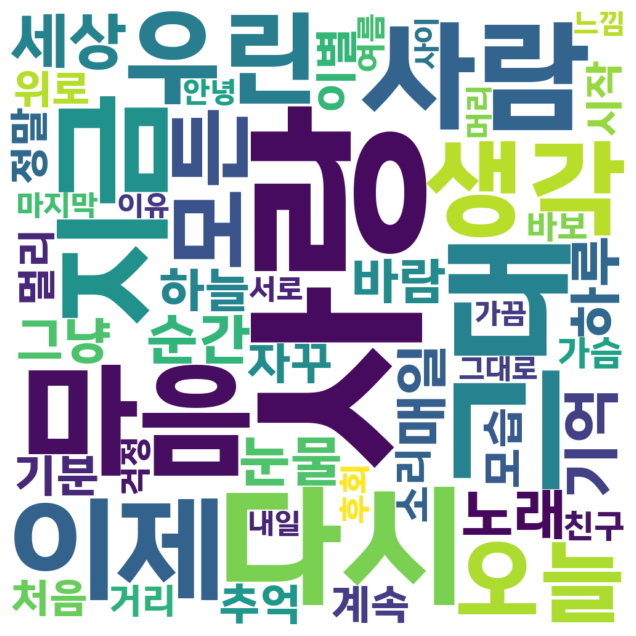

In [2]:
font_path= "/Users/yoosukyeong/Library/Fonts/LeferiPointBlack.ttf"
font_name = fm.FontProperties(fname=font_path).get_name()
#상위 50 출력
top_nouns = dict(count_nouns.most_common(50))

wc = WordCloud(font_path, background_color='white',  \
	width=1000, \
	height=1000, \
	max_words=100, \
	max_font_size=300)
wc.generate_from_frequencies(top_nouns)

plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()




/var/folders/fr/phrsn26j1xq_xzdmg1t4v5600000gn/T/ipykernel_49904/1763809879.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='명사', y='빈도', data=top_nouns_df, palette='viridis')


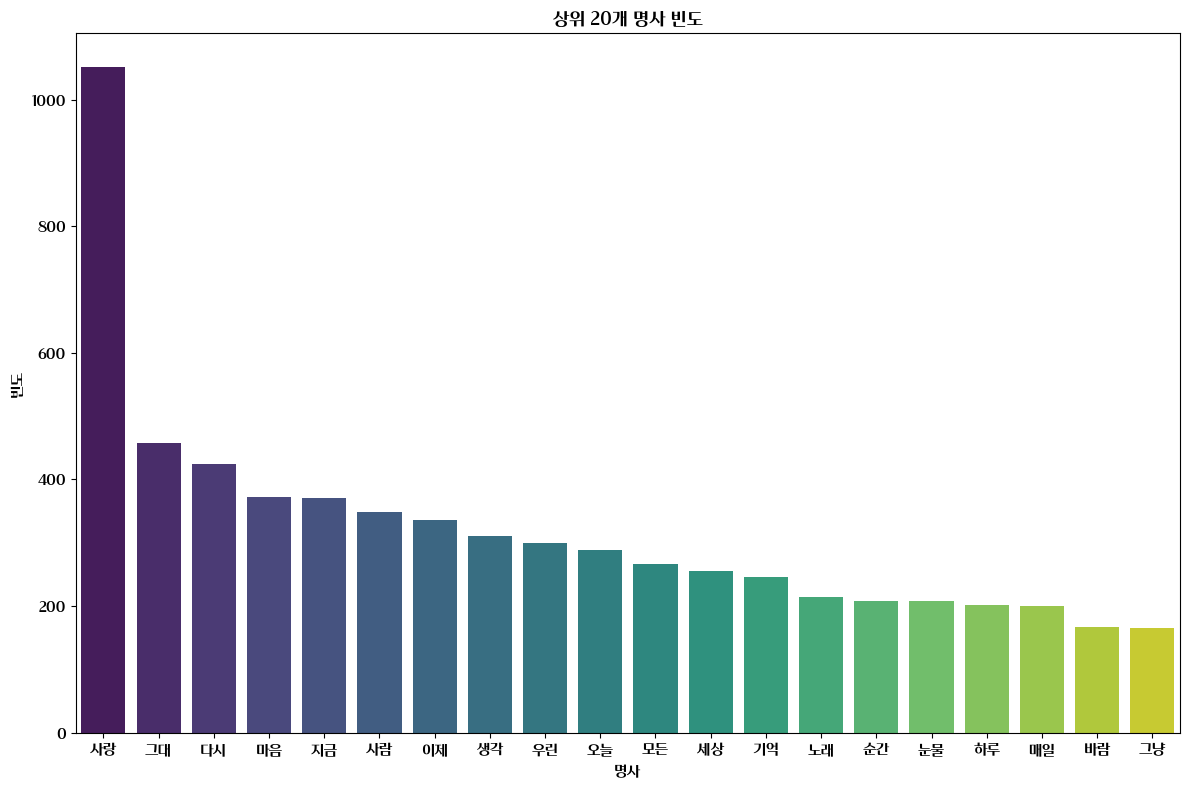

In [3]:
import seaborn as sns


top_nouns = dict(count_nouns.most_common(20))
top_nouns_df = pd.DataFrame(top_nouns.items(), columns=['명사', '빈도'])

plt.rc('font', family=font_name)
plt.figure(figsize=(12, 8))
sns.barplot(x='명사', y='빈도', data=top_nouns_df, palette='viridis')
plt.title('상위 20개 명사 빈도')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
